In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [178]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/Without_standerdize.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [179]:
df.head()

,NPA_FLAG,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,LOAN_CAT,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,CR_DR_Usage,LOAN_CAT1
0,0,699504.75,0.0,378962.46,0.0,20623.80,0.00,3146530.15,0.0,0.0,0.0,13770.79,0,1.0,7.0,261431.72,3
1,0,53083.62,0.0,2838709.68,0.0,0.00,0.00,4643556.31,0.0,0.0,0.0,1560.99,0,0.0,4.0,0.00,3
2,0,125762.58,0.0,2130590.11,0.0,227326.09,126526.97,2790521.87,0.0,0.0,0.0,8324.88,0,2.0,7.0,96000.00,0
3,0,5089.71,0.0,7822222.22,0.0,0.00,0.00,9377806.22,0.0,0.0,0.0,48863.78,0,0.0,3.0,0.00,3
4,1,427008.66,0.0,0.00,0.0,0.00,0.00,4227058.29,0.0,0.0,0.0,11543.94,1,0.0,2.0,0.00,4


In [180]:
df.columns

Index(['NPA_FLAG', 'SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY', 'LOAN_CAT',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'CR_DR_Usage',
       'LOAN_CAT1'],
      dtype='object')

In [181]:
df.shape

(11836, 17)

In [182]:
df.isna().sum()

NPA_FLAG                     0
SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
LOAN_CAT                     0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
CR_DR_Usage                  0
LOAN_CAT1                    0
dtype: int64

In [183]:
df1=df[["TOTAL_AVG_BAL","SIX_MONTH_BAL_OS_FD","NPA_FLAG","SIX_MONTH_BAL_OS_LEASING",
        "CUSTOMER_PROFITABILITY","SIX_MONTH_BAL_OS_SAVINGS"
        ,"LOAN_CAT1"]]

In [184]:
# Final dataset

In [187]:
filepath=r"C://Users//15694//Desktop//Cross selling//code//Michelle//Final_cross_selling_Dataset_ML1.csv"
df1.to_csv(filepath, index=False)

In [188]:
df1.head()

,TOTAL_AVG_BAL,SIX_MONTH_BAL_OS_FD,NPA_FLAG,SIX_MONTH_BAL_OS_LEASING,CUSTOMER_PROFITABILITY,SIX_MONTH_BAL_OS_SAVINGS,LOAN_CAT1
0,3146530.15,378962.46,0,0.0,13770.79,699504.75,3
1,4643556.31,2838709.68,0,0.0,1560.99,53083.62,3
2,2790521.87,2130590.11,0,0.0,8324.88,125762.58,0
3,9377806.22,7822222.22,0,0.0,48863.78,5089.71,3
4,4227058.29,0.00,1,0.0,11543.94,427008.66,4


In [189]:
df1.shape

(11836, 7)

In [190]:
df1['LOAN_CAT1'].value_counts()

3    4548
1    2853
2    1821
5    1222
4    1134
0     258
Name: LOAN_CAT1, dtype: int64

In [191]:
# 0= 0-100,000
# 1= 100,0000-500,000
# 2= 500,000-1,000,000
# 3=1,000,000 - 5,000,000
# 4=5,000,000-10,000,000
# 5=above 10,000,000

In [192]:
X = df1.drop(columns=["LOAN_CAT1"])
Y = df1["LOAN_CAT1"]

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix



In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [195]:
y_train.value_counts()

3    3221
1    2006
2    1246
5     831
4     796
0     185
Name: LOAN_CAT1, dtype: int64

In [196]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTE()
X_sm, Y_sm=sm.fit_resample(X_train,y_train)
print('Dataset after resampling:')
print(sorted(Counter(Y_sm).items()))

Dataset after resampling:
[(0, 3221), (1, 3221), (2, 3221), (3, 3221), (4, 3221), (5, 3221)]


In [197]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler=scaler.fit(X_sm)
X_resampled=scaler.transform(X_sm)
X_test=scaler.transform(X_test)


In [198]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']

In [199]:
import xgboost as xgb
xg_boost=xgb.XGBClassifier()
xg_boost.fit(X_resampled, Y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = xg_boost.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.6657279639538158
Precision (Macro): 0.5928764982906806
Recall (Macro): 0.6404020707953324
F1 Score (Macro): 0.6036753700805959
Confusion Matrix:
[[ 39  22   7   3   0   2]
 [ 90 551 159  42   5   0]
 [ 18 122 334  88   9   4]
 [ 21  46 177 935 125  23]
 [  4   2   3  85 201  43]
 [  1   0   1  16  69 304]]

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.53      0.32        73
           1       0.74      0.65      0.69       847
           2       0.49      0.58      0.53       575
           3       0.80      0.70      0.75      1327
           4       0.49      0.59      0.54       338
           5       0.81      0.78      0.79       391

    accuracy                           0.67      3551
   macro avg       0.59      0.64      0.60      3551
weighted avg       0.70      0.67      0.68      3551



In [201]:
y_pred_train_XG = xg_boost.predict(X_resampled)

In [202]:
acc = accuracy_score(Y_sm, y_pred_train_XG)
prec_macro = precision_score(Y_sm, y_pred_train_XG, average='macro')
recall_macro = recall_score(Y_sm, y_pred_train_XG, average='macro')
f1_macro = f1_score(Y_sm, y_pred_train_XG, average='macro')
classification_rep = classification_report(Y_sm,y_pred_train_XG)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_XG = confusion_matrix(Y_sm, y_pred_train_XG)
print("Confusion Matrix:")
print(cf_matrix_XG )
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.9015833592052158
Precision (Macro): 0.9016607014592483
Recall (Macro): 0.9015833592052157
F1 Score (Macro): 0.9013116577131116
Confusion Matrix:
[[3154   60    3    4    0    0]
 [ 148 2789  230   46    4    4]
 [  25  247 2794  123   26    6]
 [  11   61  325 2647  154   23]
 [   2    0   14  150 2970   85]
 [   0    0    4   41  106 3070]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3221
           1       0.88      0.87      0.87      3221
           2       0.83      0.87      0.85      3221
           3       0.88      0.82      0.85      3221
           4       0.91      0.92      0.92      3221
           5       0.96      0.95      0.96      3221

    accuracy                           0.90     19326
   macro avg       0.90      0.90      0.90     19326
weighted avg       0.90      0.90      0.90     19326



In [203]:
from sklearn.metrics import roc_curve,auc
y_prob1=xg_boost.predict_proba(X_test)

In [204]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob1,multi_class='ovr')

0.908741447517221

In [205]:
# tuning

In [206]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb= XGBClassifier()
xg_param_grid = {
              'n_estimators' : [100,200],
              'learning_rate': [0.01, 0.005],
              'max_depth': [4,8],
               'booster': ['gbtree'], 
              'min_samples_leaf': [100,150],
              
              }

In [207]:
gsxgb = GridSearchCV(xgb,param_grid = xg_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 2)

gsxgb.fit(X_resampled, Y_sm)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\15694\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:24:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.01, 0.005],
                         'max_depth': [4, 8], 'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [208]:
gsxgb.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_leaf=100, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [209]:
best_xg_GCV=XGBClassifier(max_depth=8, n_estimators=200,learning_rate=0.01,min_samples_leaf=100)
best_xg_GCV.fit(X_resampled, Y_sm)

C:\Users\15694\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:24:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_leaf=100, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [210]:
y_pred_xg_GCV = best_xg_GCV.predict(X_test)
y_pred_xg_GCV_train = best_xg_GCV.predict(X_resampled)

In [211]:
acc = accuracy_score(y_test, y_pred_xg_GCV)
prec_macro = precision_score(y_test,y_pred_xg_GCV, average='macro')
recall_macro = recall_score(y_test, y_pred_xg_GCV, average='macro')
f1_macro = f1_score(y_test,y_pred_xg_GCV, average='macro')
classification_rep_xg_GCV = classification_report(y_test,y_pred_xg_GCV)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_xg_gcv = confusion_matrix(y_test, y_pred_xg_GCV)
print("Confusion Matrix:")
print(cf_matrix_xg_gcv)
print("\n Test Classification Report:\n", classification_rep_xg_GCV)

Accuracy Score: 0.6499577583779217
Precision (Macro): 0.5837980434027988
Recall (Macro): 0.6368021688031432
F1 Score (Macro): 0.5906603311250205
Confusion Matrix:
[[ 40  21   9   1   0   2]
 [117 495 187  42   6   0]
 [ 28 116 340  75  13   3]
 [ 21  35 194 916 136  25]
 [  4   0   3  78 211  42]
 [  0   0   1  14  70 306]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.55      0.28        73
           1       0.74      0.58      0.65       847
           2       0.46      0.59      0.52       575
           3       0.81      0.69      0.75      1327
           4       0.48      0.62      0.55       338
           5       0.81      0.78      0.80       391

    accuracy                           0.65      3551
   macro avg       0.58      0.64      0.59      3551
weighted avg       0.70      0.65      0.66      3551



In [212]:
acc1 = accuracy_score(Y_sm, y_pred_xg_GCV_train)
prec_macro1 = precision_score(Y_sm,y_pred_xg_GCV_train, average='macro')
recall_macro1 = recall_score(Y_sm, y_pred_xg_GCV_train, average='macro')
f1_macro1 = f1_score(Y_sm,y_pred_xg_GCV_train, average='macro')
classification_rep_xg_GCV_Train = classification_report(Y_sm,y_pred_xg_GCV_train)
print("Accuracy Score:", acc1)
print("Precision (Macro):", prec_macro1)
print("Recall (Macro):", recall_macro1)
print("F1 Score (Macro):", f1_macro1)

# Confusion Matrix
cf_matrix_xg_gcv_train = confusion_matrix(Y_sm, y_pred_xg_GCV_train)
print("Confusion Matrix:")
print(cf_matrix_xg_gcv_train)
print("\n Train Classification Report:\n", classification_rep_xg_GCV_Train)

Accuracy Score: 0.8258822311911415
Precision (Macro): 0.8260833618036075
Recall (Macro): 0.8258822311911415
F1 Score (Macro): 0.8252941131709517
Confusion Matrix:
[[3009  113   37   53    9    0]
 [ 337 2373  409   86   11    5]
 [  48  334 2551  222   47   19]
 [  34   61  406 2403  269   48]
 [   7    2   16  326 2690  180]
 [   0    0    4   72  210 2935]]

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      3221
           1       0.82      0.74      0.78      3221
           2       0.75      0.79      0.77      3221
           3       0.76      0.75      0.75      3221
           4       0.83      0.84      0.83      3221
           5       0.92      0.91      0.92      3221

    accuracy                           0.83     19326
   macro avg       0.83      0.83      0.83     19326
weighted avg       0.83      0.83      0.83     19326



In [213]:

y_prob=best_xg_GCV.predict_proba(X_test)

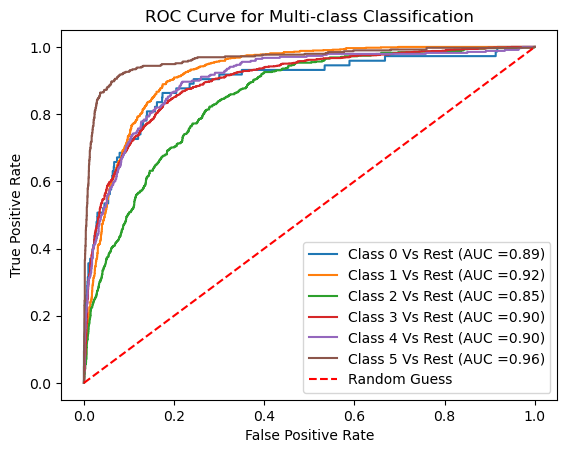

In [214]:
for i in range(len(np.unique(Y))):
    fpt,tpr,_=roc_curve(y_test==i,y_prob[:,i])
    roc_auc=auc(fpt,tpr)
    plt.plot(fpt,tpr,label=f'Class {i} Vs Rest (AUC ={roc_auc:.2f})')
    
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()

In [1]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob,multi_class='ovr')

NameError: name 'y_test' is not defined

# Making a predictive system


In [216]:
X_train.head()

,TOTAL_AVG_BAL,SIX_MONTH_BAL_OS_FD,NPA_FLAG,SIX_MONTH_BAL_OS_LEASING,CUSTOMER_PROFITABILITY,SIX_MONTH_BAL_OS_SAVINGS
216,4173789.98,524193.55,0,0.0,-3446.07,76421.81
9236,1139488.30,0.00,0,0.0,3879.41,35005.27
10272,1213593.54,0.00,0,0.0,3770.80,16207.42
4240,10566061.01,0.00,1,0.0,7133.77,104887.79
4482,2028193.84,1200000.00,0,0.0,1581.97,46272.98


In [217]:
input_data = (11434729.22,4236559.14,0,0.0,45987.69,417459.07)

In [218]:
input_data

(11434729.22, 4236559.14, 0, 0.0, 45987.69, 417459.07)

In [219]:
data = {'TOTAL_AVG_BAL': [11434729.22],
        'SIX_MONTH_BAL_OS_FD': [4236559.14],
        'NPA_FLAG': [0],
       'SIX_MONTH_BAL_OS_LEASING': [0.0],
       'CUSTOMER_PROFITABILITY': [45987.69],
       'SIX_MONTH_BAL_OS_SAVINGS': [417459.07]}
df_val = pd.DataFrame(data)

In [220]:
df_val

,TOTAL_AVG_BAL,SIX_MONTH_BAL_OS_FD,NPA_FLAG,SIX_MONTH_BAL_OS_LEASING,CUSTOMER_PROFITABILITY,SIX_MONTH_BAL_OS_SAVINGS
0,11434729.22,4236559.14,0,0.0,45987.69,417459.07


In [221]:
# Changing the input data to numpy array

In [222]:
input_data_as_numpy_array = np.asarray(input_data)

In [223]:
input_data_as_numpy_array

array([11434729.22,  4236559.14,        0.  ,        0.  ,    45987.69,
         417459.07])

In [224]:
df2 = pd.DataFrame(input_data)

In [225]:
df=pd.DataFrame(data=input_data_as_numpy_array)

In [226]:
df2

,0
0,11434729.22
1,4236559.14
2,0.00
3,0.00
4,45987.69
5,417459.07


In [227]:
#reshape the array as we are predicting for one instance

In [228]:
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshape)

[[11434729.22  4236559.14        0.          0.      45987.69   417459.07]]


In [229]:
X_resampled

array([[-9.82365719e-02, -6.35950280e-02, -3.77718570e-01,
        -1.58003614e-01, -1.26033170e-02, -9.12756646e-02],
       [-1.28698386e-01, -9.21297994e-02, -3.77718570e-01,
        -1.58003614e-01, -8.35558787e-03, -9.84493180e-02],
       [-1.27954432e-01, -9.21297994e-02, -3.77718570e-01,
        -1.58003614e-01, -8.41856611e-03, -1.01705246e-01],
       ...,
       [ 5.16373508e-02, -9.21297994e-02, -3.77718570e-01,
        -1.58003614e-01, -1.35454910e-03, -1.01165150e-01],
       [ 6.98213044e+00,  1.65884734e+01, -3.77718570e-01,
         1.96623855e+01,  1.20891786e+00,  2.34552310e+01],
       [ 2.32980184e-02, -8.61447740e-02, -3.77718570e-01,
         1.70027378e+00,  1.25786772e-02, -4.33604148e-02]])

In [ ]:
#Standardize data

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(input_data_reshape)

In [231]:
sc = joblib.load("scaler.save")
df_val1=sc.transform(df_val)

In [232]:
print(df_val1)

[[-0.0253429   0.13848969 -0.37771857 -0.15800361  0.01606118 -0.03220547]]


In [233]:
std_data

array([[0., 0., 0., 0., 0., 0.]])

In [242]:
prediction = best_xg_GCV.predict(df_val1)
print(prediction)

if prediction == 0:
    print("LNAMOUNT <=1 Lakh")
elif prediction == 1:
    print("1 Lakh < LNAMOUNT <= 5 Lakh")
elif prediction == 2:
    print("5 Lakh < LNAMOUNT <= 1M")
elif prediction == 3:
    print("1M < LNAMOUNT <= 5M")
elif prediction == 4:
    print("5M < LNAMOUNT <= 10M")
elif prediction == 5:
    print("LNAMOUNT > 10M")
else:
    print("Invalid prediction")

[4]
5M < LNAMOUNT <= 10M


In [239]:
#Probability

In [257]:
predicted_probability =  best_xg_GCV.predict_proba(df_val1)
predicted_probability
#print(f"Predicted probability: {predicted_probability[0]:.2f}")

array([[0.04785804, 0.04879631, 0.0543253 , 0.11453572, 0.662725  ,
        0.07175962]], dtype=float32)

## Saving the trained model


In [243]:
import pickle

In [246]:
filename = "Trained_model.sav"

In [247]:
# Open the file in write-binary mode ('wb')
with open(filename, 'wb') as file:
    pickle.dump(best_xg_GCV, file)[]

In [251]:
#Loading the saved model
loaded_model = pickle.load(open('Trained_model.sav', 'rb'))


In [252]:
input_data = (11434729.22,4236559.14,0,0.0,45987.69,417459.07)

data = {'TOTAL_AVG_BAL': [11434729.22],
        'SIX_MONTH_BAL_OS_FD': [4236559.14],
        'NPA_FLAG': [0],
       'SIX_MONTH_BAL_OS_LEASING': [0.0],
       'CUSTOMER_PROFITABILITY': [45987.69],
       'SIX_MONTH_BAL_OS_SAVINGS': [417459.07]}
df_val = pd.DataFrame(data)

df2 = pd.DataFrame(input_data)

df=pd.DataFrame(data=input_data_as_numpy_array)

In [253]:
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshape)

[[11434729.22  4236559.14        0.          0.      45987.69   417459.07]]


In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(input_data_reshape)

sc = joblib.load("scaler.save")
df_val1=sc.transform(df_val)

In [255]:
prediction = loaded_model.predict(df_val1)
print(prediction)

if prediction == 0:
    print("LNAMOUNT <=1 Lakh")
elif prediction == 1:
    print("1 Lakh < LNAMOUNT <= 5 Lakh")
elif prediction == 2:
    print("5 Lakh < LNAMOUNT <= 1M")
elif prediction == 3:
    print("1M < LNAMOUNT <= 5M")
elif prediction == 4:
    print("5M < LNAMOUNT <= 10M")
elif prediction == 5:
    print("LNAMOUNT > 10M")
else:
    print("Invalid prediction")

[4]
5M < LNAMOUNT <= 10M
